# Gradient Descent Intro
 <p>

In [15]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [16]:
def lin(a,b,x): return a*x+b

In [17]:
a=3.
b=8.

In [18]:
n=30
x = random(n)
y = lin(a,b,x)

In [19]:
x

array([ 0.0155,  0.756 ,  0.8798,  0.7741,  0.8831,  0.3425,  0.7936,  0.1043,  0.3956,  0.931 ,
        0.3076,  0.8305,  0.914 ,  0.9644,  0.8654,  0.9793,  0.9808,  0.9745,  0.0851,  0.4595,
        0.6603,  0.2157,  0.0839,  0.6564,  0.7842,  0.4263,  0.8814,  0.0526,  0.9923,  0.6046])

In [20]:
y

array([  8.0466,  10.2679,  10.6395,  10.3223,  10.6493,   9.0274,  10.3809,   8.3129,   9.1867,
        10.7931,   8.9227,  10.4914,  10.7421,  10.8931,  10.5962,  10.9378,  10.9423,  10.9235,
         8.2553,   9.3784,   9.9808,   8.647 ,   8.2516,   9.9693,  10.3527,   9.279 ,  10.6441,
         8.1577,  10.9768,   9.8137])

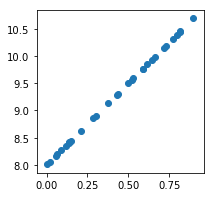

In [8]:
plt.scatter(x,y)

In [10]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [11]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

8.8048

In [12]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [21]:
def upd():
    global a_guess, b_guess
    
    # make a prediction using the current weights
    y_pred = lin(a_guess, b_guess, x)
    
    # calculate the derivate of the loss
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    
    # update our weights by moving in direction of steepest descent
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [14]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani